In [1]:
import cv2
import pickle
import tempfile
import chassisml
import numpy as np
import getpass
from shutil import rmtree
import json
import onnx
from onnx import backend
from onnx import numpy_helper
import onnxruntime as ort
from transformers import GPT2Model, GPT2LMHeadModel, GPT2Tokenizer

## Enter credentials
Dockerhub creds and Modzy API Key

In [2]:
dockerhub_user = getpass.getpass('docker hub username')
dockerhub_pass = getpass.getpass('docker hub password')
modzy_api_key = getpass.getpass('modzy api key')

docker hub username········
docker hub password········
modzy api key········


## Load ONNX Model and Test Locally
This model was downloaded from the [ONNX Model Zoo](https://github.com/onnx/models/tree/master/text/machine_comprehension/gpt-2), which contains several pre-trained models saved in the ONNX open standard format.

In [3]:
# check gpt-2 and gpt-2 head models are valid onnx models files
model = onnx.load("models/model.onnx")
head_model = onnx.load("models/head_model.onnx")

# check onnx file is valid model
onnx.checker.check_model(model)
onnx.checker.check_model(head_model)

In [ ]:
# test model locally
sample_text = "Hello World, today is a great day to operationalize a model using this awesome tool called Chassis!"

sess = onnxruntime.InferenceSession(file)
ort_inputs = dict((sess.get_inputs()[i].name, to_numpy(input)) for i, input in enumerate(inputs_flatten))
res = sess.run(None, ort_inputs)

In [6]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [7]:
# load input tokenizer
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [9]:
token_inputs = gpt2_tokenizer.encode("Hi this is a test", add_special_tokens=True)

In [13]:
token_inputs

[17250, 428, 318, 257, 1332]

In [14]:
f_ = "data/input_0.pb"
tensor = onnx.TensorProto()
with open(f_, 'rb') as file:
    tensor.ParseFromString(file.read())
test_inputs = numpy_helper.to_array(tensor)

In [19]:
def flatten(inputs):
    return [[flatten(i) for i in inputs] if isinstance(inputs, (list, tuple)) else inputs]
def to_numpy(x):
    if type(x) is not np.ndarray:
        x = x.detach().cpu().numpy() if x.requires_grad else x.cpu().numpy()
    return x

In [98]:
text = "Here is some text to encode : Hello World!"
test_inputs = flatten(np.array(gpt2_tokenizer.encode(text)))

In [99]:
session = ort.InferenceSession("models/head_model.onnx")
ort_inputs = dict((session.get_inputs()[i].name, to_numpy(input)) for i, input in enumerate(flattened_inputs))
output = session.run(None, ort_inputs)

In [90]:
ort_inputs

{'input1': array([[[ 4342,   318,   617,  2420,   284, 37773, 18435,  2159]]],
       dtype=int64)}

In [78]:
prev

tensor([[[  11],
         [ 262],
         [ 286],
         [ 422],
         [1037],
         [ 262],
         [2159],
         [  13]]])

In [81]:
output = prev[:, len(gpt2_tokenizer.encode(text)):].tolist()

In [74]:
for i in range(len(prev)):
    print(prev[i])

tensor([[  11],
        [ 262],
        [ 286],
        [ 422],
        [1037],
        [ 262],
        [2159],
        [  13]])


In [67]:
logits = torch.from_numpy(output[0])
logits = logits[:, -1, :]
log_probs = F.softmax(logits, dim=-1)
_, prev = torch.topk(log_probs, k=1, dim=-1)
output = torch.cat((output, prev), dim=1)

TypeError: expected Tensor as element 0 in argument 0, but got list

In [100]:
ort_inputs

{'input1': array([[[ 4342,   318,   617,  2420,   284, 37773, 18435,  2159]]],
       dtype=int64)}

In [94]:
ort_inputs["input1"].shape

(1, 10)

In [97]:
ort_inputs

{'input1': array([[ 4342,   318,   617,  2420,   284, 37773,  1058, 18435,  2159,
             0]], dtype=int64)}

In [96]:
import numpy as np
import torch
import torch.nn.functional as F
from transformers import GPT2Tokenizer

batch_size = 1
length = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

text = "Here is some text to encode : Hello World!"
tokens = np.array(tokenizer.encode(text))
context = torch.tensor(tokens, device=device, dtype=torch.long).unsqueeze(0)#.repeat(batch_size, 1)
prev = context
output = context

for i in range(length):
    sess = ort.InferenceSession("models/head_model.onnx")
    ort_inputs = dict((session.get_inputs()[i].name, to_numpy(input)) for i, input in enumerate(flatten(prev)))
    outputs = sess.run(None, ort_inputs)
#     outputs = model(prev)
    logits = outputs[0]
    logits = logits[:, -1, :]
    log_probs = F.softmax(logits, dim=-1)
    _, prev = torch.topk(log_probs, k=1, dim=-1)
    output = torch.cat((output, prev), dim=1)

output = output[:, len(tokens):].tolist()
generated = 0
for i in range(batch_size):
    generated += 1
    text = tokenizer.decode(output[i])
    print(text)

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Invalid rank for input: input1 Got: 2 Expected: 3 Please fix either the inputs or the model.

In [32]:
output

[array([[[[ -34.302658,  -33.98911 ,  -37.568275, ...,  -42.6734  ,
            -42.0399  ,  -34.613556],
          [ -83.306496,  -82.9769  ,  -86.120415, ...,  -89.806244,
            -89.4546  ,  -83.60838 ],
          [ -91.49007 ,  -92.565544,  -95.64229 , ...,  -96.618324,
            -98.154526,  -91.52658 ],
          ...,
          [ -92.88199 ,  -94.84328 ,  -98.922386, ..., -101.44257 ,
           -103.27019 ,  -95.764175],
          [ -72.61406 ,  -76.34074 ,  -79.79736 , ...,  -87.33001 ,
            -85.793   ,  -77.75212 ],
          [-103.61468 , -108.78979 , -109.62762 , ..., -116.8557  ,
           -116.55652 , -107.44668 ]]]], dtype=float32),
 array([[[[[-1.25802207e+00,  1.58518052e+00,  1.08961844e+00, ...,
            -1.51866841e+00, -3.57770026e-02,  1.12035584e+00],
           [-1.83480835e+00,  2.49545670e+00,  1.74972844e+00, ...,
            -1.53973925e+00, -2.36852789e+00,  2.44819450e+00],
           [-2.31877208e+00,  2.12575150e+00,  1.67420828e+00, ...

In [28]:
len(output)

13

In [25]:
formatted = [np.testing.assert_allclose(to_numpy(output), res[i], rtol=1e-03, atol=1e-05) for i, output in enumerate(outputs_flatten)]

NameError: name 'outputs_flatten' is not defined

In [ ]:
MODELS = [
    (GPT2Model, GPT2Tokenizer, 'gpt2', 'gpt2'),
    (GPT2LMHeadModel, GPT2Tokenizer, 'gpt2', 'gpt2-lm-head'),
]

In [ ]:
    for model_class, tokenizer_class, pretrained_weights, save_name in MODELS:
        tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
        model = model_class.from_pretrained(pretrained_weights)
        model.eval()

In [4]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [5]:
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [3]:
# load model
model = onnx.load("models/mobilenetv2-7.onnx")

# check onnx file is valid model
onnx.checker.check_model(model)

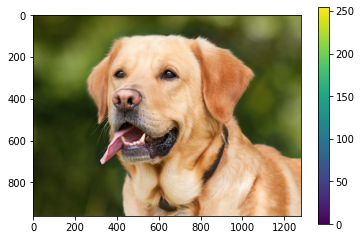

In [4]:
# format sample data and reshape
img = cv2.cvtColor(cv2.imread('data/dog.jpg'), cv2.COLOR_BGR2RGB)
img_show = cv2.resize(img, (224,224))

sample_img = np.reshape(img_show, (1,3,224,224)).astype(np.float32)

# load imagenet labels
labels = pickle.load(open('./data/imagenet_labels.pkl','rb'))

# visualize image
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# create onnx runtime inference session and print top prediction
session = ort.InferenceSession("models/mobilenetv2-7.onnx")
results = session.run(None, {"input": sample_img})
print("Top Prediction: {}".format(labels[results[0].argmax()]))

Top Prediction: sunglass


## Prepare context dict
Initialize anything here that should persist across inference runs

In [17]:
# This will be passed to Chassis:
context = {
    "model": model,
    "labels": labels
}

## Write process function

* Must take bytes and context dict as input
* Preprocess bytes, run inference, postprocess model output, return results

In [18]:
def process(input_bytes,context):
    # save model to filepath for inference
    tmp_dir = tempfile.mkdtemp()
    import onnx
    onnx.save(context["model"], "{}/model.onnx".format(tmp_dir))
    
    # preprocess data
    decoded = cv2.cvtColor(cv2.imdecode(np.frombuffer(input_bytes, np.uint8), -1), cv2.COLOR_BGR2RGB)
    img = cv2.resize(decoded, (224,224))
    img = np.reshape(img, (1,3,224,224)).astype(np.float32)
    
    # run inference
    session = ort.InferenceSession("{}/model.onnx".format(tmp_dir))
    results = session.run(None, {"input": img})
    
    # postprocess
    inference_result = context["labels"][results[0].argmax()]
    
    # format results
    structured_result = {
        "data": {
            "result": {"classPredictions": [{"class": str(inference_result)}]}
        }
    }
    
    # remove temp directory
    rmtree(tmp_dir)
    return structured_result

## Initialize Chassis Client
We'll use this to interact with the Chassis service

In [19]:
chassis_client = chassisml.ChassisClient("http://localhost:5000")

## Create and test Chassis model
* Requires `context` dict containing all variables which should be loaded once and persist across inferences
* Requires `process_fn` defined above

In [20]:
# create Chassis model
chassis_model = chassis_client.create_model(context=context,process_fn=process)

# test Chassis model locally (can pass filepath, bufferedreader, bytes, or text here):
sample_filepath = './data/dog.jpg'
results = chassis_model.test(sample_filepath)
print(results)

b'{"data":{"result":{"classPredictions":[{"class":"sunglass"}]}}}'


In [21]:
# test environment and model within Chassis service, must pass filepath here:

# dry run before build
test_env_result = chassis_model.test_env(sample_filepath)
print(test_env_result)

Starting test job... Ok!
{'model_output': 'Single input prediction:\n\nb\'{"data":{"result":{"classPredictions":[{"class":"sunglass"}]}}}\'\n'}


## Publish model to Modzy
Need to provide model name, model version, Dockerhub credentials, and required Modzy info

In [22]:
response = chassis_model.publish(
    model_name="ONNX MobileNet Image Classification",
    model_version="0.0.1",
    registry_user=dockerhub_user,
    registry_pass=dockerhub_pass,
    modzy_sample_input_path=sample_filepath,
    modzy_api_key=modzy_api_key
)

job_id = response.get('job_id')
final_status = chassis_client.block_until_complete(job_id)

Starting build job... Ok!


In [23]:
if chassis_client.get_job_status(job_id)["result"] is not None:
    print("New model URL: {}".format(chassis_client.get_job_status(job_id)["result"]["container_url"]))
else:
    print("Chassis job failed \n\n {}".format(chassis_client.get_job_status(job_id)))

New model URL: https://integration.modzy.engineering/models/ehojcqknx4/0.0.1


## Run sample job using Modzy SDK
Submit inference job to our newly-deploy model running on Modzy

In [24]:
from modzy import ApiClient

client = ApiClient(base_url='https://integration.modzy.engineering/api', api_key=modzy_api_key)

input_name = final_status['result']['inputs'][0]['name']
model_id = final_status['result'].get("model").get("modelId")
model_version = final_status['result'].get("version")

inference_job = client.jobs.submit_file(model_id, model_version, {input_name: sample_filepath})
inference_job_result = client.results.block_until_complete(inference_job, timeout=None)
inference_job_results_json = inference_job_result.get_first_outputs()['results.json']
print(inference_job_results_json)

ApiObject({
  "data": {
    "result": {
      "classPredictions": [
        {
          "class": "sunglass"
        }
      ]
    }
  }
})
